## Start of chapter 3

In [101]:
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
# %matplotlib inline

In [ ]:
print(torch.cuda.is_available())

In [ ]:
weight=0.7
bias=0.3
start=0
end=1
step=0.02
x=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*x+bias
# x[:10],y[:10],len(x),len(y),x.shape,y.shape,len(y)

the ratio between the traning set and the validation set is <br>
*traning set : 60%-80%<br>
*validation set : 10%-20%<br>
*test set : 10%-20%<br>

In [ ]:
train_split=int(0.8*len(x))
x_train=x[:train_split]
y_train=y[:train_split]
x_test=x[train_split:]
y_test=y[train_split:]
len(x_train),len(x_test),len(y_train),len(y_test)
# print(x_train)
# print(y_train)
# print(x_test)
# print(y_test)



In [ ]:
df=pd.read_csv('all_fuels_data.csv')
df['diff']=df['open']-df['close']
df.head()

In [ ]:
#count each value in the commodities column are there in the dataset and convert it to precentage
df['commodity'].value_counts(normalize=True)
#do the same for ticker column
df['ticker'].value_counts(normalize=True)

In [ ]:
plt.plot(x_train, 'ro', label='Original data')
plt.plot(x_test, 'bo', label='Original data')

In [ ]:
x_train,y_train,x_test,y_test =train_test_split(x,y,test_size=0.2)

In [ ]:
y_test

In [70]:
#create a scatter plot of the data
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))
        self.bias= nn.Parameter(torch.randn(1,requires_grad=True, dtype=torch.float32))
    def forward(self, x):
        return torch.matmul(x, self.weights)

In [84]:
#create an instance of the class
seed=torch.manual_seed(42)
input_size = 1
output_size = 1
model = LinearRegression()
#create a manual seed
list(model.state_dict().items())


[('weights', tensor([0.3367])), ('bias', tensor([0.1288]))]

tensor([0.0000, 0.0067, 0.0135, 0.0202, 0.0269, 0.0337, 0.0404, 0.0471, 0.0539,
        0.0606, 0.0673, 0.0741, 0.0808, 0.0875, 0.0943, 0.1010, 0.1077, 0.1145,
        0.1212, 0.1279, 0.1347, 0.1414, 0.1481, 0.1549, 0.1616, 0.1683, 0.1751,
        0.1818, 0.1885, 0.1953, 0.2020, 0.2087, 0.2155, 0.2222, 0.2289, 0.2357,
        0.2424, 0.2492, 0.2559, 0.2626, 0.2694, 0.2761, 0.2828, 0.2896, 0.2963,
        0.3030, 0.3098, 0.3165, 0.3232, 0.3300])


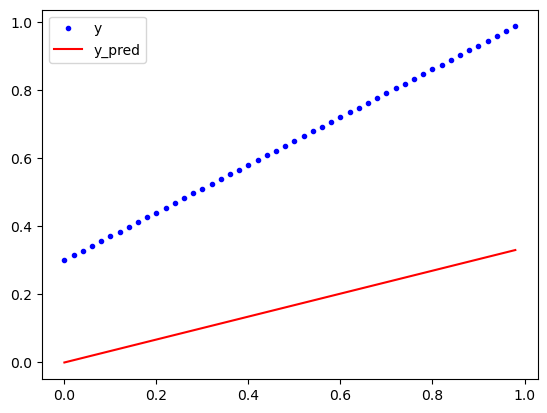

In [89]:
with torch.inference_mode():
    y_pred = model(x)
    print(y_pred)

#plot the y_pred
plt.plot(x, y, 'b.', label='y')
plt.plot(x.numpy(), y_pred.detach().numpy(), 'r-', label='y_pred')
plt.legend()
plt.show()

## Train the model

In [103]:
loss_fn=nn.L1Loss(reduction='mean')
loss=loss_fn(y_pred,y_train)
print(loss)
#setup optimizer
optimizer=torch.optim.SGD(model.parameters(),lr=1e-5)
#training loop
for t in range(2000):
    #forward pass
    y_pred=model(x_train)
    #compute loss
    loss=loss_fn(y_pred,y_train)
    if t%100==99:
        print(t,loss.item())
    #zero the gradients before running the backward pass
    optimizer.zero_grad()
    #backward pass
    loss.backward()
    #update the parameters
    optimizer.step()

c:\Users\matan.s\AppData\Local\anaconda3\envs\ai\lib\site-packages\torch\nn\modules\loss.py:101: UserWarning: Using a target size (torch.Size([10, 1])) that is different to the input size (torch.Size([50])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
c:\Users\matan.s\AppData\Local\anaconda3\envs\ai\lib\site-packages\torch\nn\modules\loss.py:101: UserWarning: Using a target size (torch.Size([10, 1])) that is different to the input size (torch.Size([40])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


tensor(0.3762, grad_fn=<MeanBackward0>)
99 0.37787550687789917
199 0.3778228461742401
299 0.37777018547058105
399 0.377717524766922
499 0.37766486406326294
599 0.3776122033596039
699 0.37755951285362244
799 0.3775068521499634
899 0.3774541914463043
999 0.3774015009403229
1099 0.3773488998413086
1199 0.37729620933532715
1299 0.3772435486316681
1399 0.3771916627883911
1499 0.37714049220085144
1599 0.37708938121795654
1699 0.37703830003738403
1799 0.3769872188568115
1899 0.37693727016448975
1999 0.37688741087913513
